# **Milestone 1**



1. Acquisition de données (25 %)


Définir l'URL de base de l'API de la LNH

In [ ]:
import os
import requests
import json

base_url = "https://statsapi.web.nhl.com/api/v1/game/"

def download_nhl_data(season, file_path):
    # Vérifier si le fichier de données existe déjà
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
    else:
        game_type = "02"  # Saison régulière
        data = []  # Stocker les données de tous les matchs

        is_game_number = True
        game = 1
        # Parcourir tous les matchs de la saison demandée
        while is_game_number :
            # Créer le GAME_ID en fonction de l'année cible, du type de jeu et du numéro de jeu
            game_id = f"{season}{game_type}{str(game).zfill(4)}"
            # Composer l'URL complet
            url = f"{base_url}{game_id}/feed/live/"

            # Effectuer une requête HTTP pour télécharger les données
            response = requests.get(url)

            if response.status_code == 200:
                game_data = response.json()
                data.append(game_data)
                game += 1
            else:
                print(f"Erreur lors du téléchargement des données pour le match {game} de la saison {season}")
                is_game_number = False

        # Sauvegarder toutes les données dans le fichier spécifié
        with open(file_path, 'w') as file:
            json.dump(data, file)

    return data


Télécharger les données pour la saison choisie par l'utilisateur

In [ ]:
seasons_data = {}

seasons_data["2016"] = download_nhl_data(2016, "nhl_data_2016.json")
seasons_data["2017"] = download_nhl_data(2017, "nhl_data_2017.json")
seasons_data["2018"] = download_nhl_data(2018, "nhl_data_2018.json")
seasons_data["2019"] = download_nhl_data(2019, "nhl_data_2019.json")
seasons_data["2020"] = download_nhl_data(2020, "nhl_data_2020.json")

Erreur lors du téléchargement des données pour le match 1231 de la saison 2016
Erreur lors du téléchargement des données pour le match 1272 de la saison 2017
Erreur lors du téléchargement des données pour le match 1272 de la saison 2018
Erreur lors du téléchargement des données pour le match 1272 de la saison 2019
Erreur lors du téléchargement des données pour le match 869 de la saison 2020


# 2. Outil de débogage interactif (bonus 10%)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image
import ipywidgets as widgets
from IPython.display import display, clear_output
from tabulate import tabulate

In [ ]:
# Création d'un menu déroulant (dropdown) avec les clés de seasons_data
seasons_dropdown = widgets.Dropdown(
    options=list(seasons_data.keys()),  # Utilisez les clés du dictionnaire comme options
    description='Saison:',
    disabled=False,
)

# Création d'un slider pour sélectionner le jeu
game_id_slider = widgets.IntSlider(
    min=1,
    max=len(seasons_data[seasons_dropdown.value]),
    step=1,
    description='Game ID:',
    disabled=False,
)

# Création d'un slider pour l'ID de l'événement
event_id_slider = widgets.IntSlider(
    min=1,
    max=1,
    step=1,
    description='i:',
    disabled=False,
)

# Créez une sortie pour afficher les données
output = widgets.Output()

# Mise à jour de l'affichage lorsque l'utilisateur modifie les valeurs du dropdown ou des sliders
def update_output(selected_season,season_data, game_id_slider):
    with output:
        clear_output(wait=True)  # Effacez la sortie précédente
        selected_game_id = game_id_slider.value
        abbr_team_away = season_data[selected_game_id].get("gameData")["teams"]["away"]["abbreviation"]
        abbr_team_home = season_data[selected_game_id].get("gameData")["teams"]["home"]["abbreviation"]
        game_datetime = season_data[selected_game_id].get("gameData")["datetime"]["dateTime"]
        # Récupérer la liste des événements
        events_list = season_data[selected_game_id].get("liveData")["plays"]["allPlays"]
        # Récupérer le dernier eventIdx qui correspond au dernier événement du match
        last_event_idx = events_list[-1]["about"]["eventIdx"]
        event_id_slider.max = int(last_event_idx)
        coordo_event = events_list[event_id_slider.value]["coordinates"]
        event_desc = events_list[event_id_slider.value]["result"]["description"]

        # Créer une liste de données pour le tableau
        table_data = []
        # 1ère ligne : Intitulés des colonnes
        table_data.append(["", "Home", "Away"])
        # 2ème ligne : Teams
        home_team = abbr_team_home
        away_team = abbr_team_away
        table_data.append(["Teams :", home_team, away_team])
        # 3ème ligne : Goals
        # Se met à jour en fonction des événement (i)
        home_goals = events_list[event_id_slider.value]["about"]["goals"]["home"]
        away_goals = events_list[event_id_slider.value-1]["about"]["goals"]["away"]
        table_data.append(["Goals :", home_goals, away_goals])
        # 4ème ligne : SoG (Shots on Goal)
        # Est le même pour chaque game id
        home_sog = season_data[selected_game_id].get("liveData")["linescore"]["teams"]["home"]["shotsOnGoal"]
        away_sog = season_data[selected_game_id].get("liveData")["linescore"]["teams"]["away"]["shotsOnGoal"]
        table_data.append(["SoG :", home_sog, away_sog])
        # 5ème ligne : SO Goals (Buts lors des tirs de barrage)
        # Est le même pour chaque game id
        home_so_goals = season_data[selected_game_id].get("liveData")["linescore"]["shootoutInfo"]["home"]["scores"]
        away_so_goals = season_data[selected_game_id].get("liveData")["linescore"]["shootoutInfo"]["away"]["scores"]
        periodTime = events_list[event_id_slider.value]["about"]["periodTime"]
        period = events_list[event_id_slider.value]["about"]["period"]
        table_data.append(["SO Goals :", home_so_goals, away_so_goals])
        # 6ème ligne : SO Attempts (Tentatives lors des tirs de barrage)
        # Est le même pour chaque game id
        home_so_attempts = season_data[selected_game_id].get("liveData")["linescore"]["shootoutInfo"]["away"]["attempts"]
        away_so_attempts = season_data[selected_game_id].get("liveData")["linescore"]["shootoutInfo"]["away"]["attempts"]
        table_data.append(["SO Attempts :", home_so_attempts, away_so_attempts])
        # Afficher le tableau
        table = tabulate(table_data, headers="firstrow")


        # Création d'une figure Matplotlib
        fig, ax = plt.subplots(figsize=(10, 5))
        # Chargement de l'image de fond
        img = matplotlib.image.imread('./figures/nhl_rink.png')
        ax.imshow(img, extent=[-100, 100, -42.5, 42.5], alpha=1)  # Affichez l'image avec les limites d'axes
        # Définition des plages d'axes
        plt.xlim(-100, 100)
        plt.ylim(-42.5, 42.5)
        # Ajout des étiquettes pour les axes
        plt.xlabel('feet')
        plt.ylabel('feet')
        # Ajout titre
        title_graph = str(f"{abbr_team_away}                                               {abbr_team_home}")
        plt.title(title_graph)
        # Ajout d'un point bleu aux coordonnées spécifiées
        if coordo_event != {} :
            x= coordo_event['x']
            y= coordo_event['y']
            plt.scatter(x, y, c='blue', s=100)
        # Affichage
        print(f"Date : {game_datetime}")
        print(f"Saison sélectionnée : {selected_season}")
        print(f"Game ID : {selected_game_id} ; {abbr_team_home} (home) vs {abbr_team_away} (away)\n")
        print(table)
        print(f"\n\nDétail de l'événement : {event_desc}")
        print(f"Temps de jeu : {periodTime} P-{period}")
        plt.show()
        info = seasons_data[str(seasons_dropdown.value)][game_id_slider.value].get("liveData")["plays"]["allPlays"][event_id_slider.value]
        print(info)


# Fonction pour mettre à jour la sortie lorsque la saison est modifiée
def season_update_output():
    selected_season = str(seasons_dropdown.value)
    season_data = seasons_data[selected_season]
    game_id_slider.max = len(season_data)
    game_id_slider.value = 1
    update_output(selected_season,season_data, game_id_slider)

# Fonction pour mettre à jour la sortie lorsque le game id est modifiée
def game_update_output():
    selected_season = str(seasons_dropdown.value)
    season_data = seasons_data[selected_season]
    game_id_slider.max = len(season_data)
    update_output(selected_season,season_data, game_id_slider)

# Lorsque la valeur du dropdown change, appel de la fonction season_update_output
seasons_dropdown.observe(lambda change: season_update_output(), names='value')

# Lorsque la valeur du slider game id change, appel de la fonction game_update_output
game_id_slider.observe(lambda change: game_update_output(), names='value')

# Lorsque la valeur du slider event (i) change, appel de la fonction game_update_output
# Il est inutile de créer en event_update_output
event_id_slider.observe(lambda change: game_update_output(), names='value')

# Affichez le menu déroulant, le slider et la sortie
display(seasons_dropdown, game_id_slider, event_id_slider, output)

# Appelez manuellement la fonction update_output pour afficher la sortie dès le départ
season_update_output()


Dropdown(description='Saison:', options=('2016', '2017', '2018', '2019', '2020'), value='2016')

IntSlider(value=1, description='Game ID:', max=1230, min=1)

IntSlider(value=1, description='i:', max=1, min=1)

Output()


4. Rangez les données (10 %)

In [ ]:
import pandas as pd
import numpy as np
#Helper Function
def role(z):
  shooter = []
  assist = []
  guardian = []

  for player in z:
    if player['playerType'] in ["Shooter", 'Scorer']:
      shooter.append((player['player']['fullName'], player['player']['id']))
    elif player['playerType'] == 'Assist':
      assist.append((player['player']['fullName'], player['player']['id']))
    elif player['playerType'] == 'Goalie':
      guardian.append((player['player']['fullName'], player['player']['id']))
    else:
      print("new player type: "+ player['playerType'])
  if len(guardian) == 0:
    guardian = ("Empty", 0)
  else:
    guardian = guardian[0]
  return [shooter, assist, guardian]


def stringCoordx(strCoord):
  l = strCoord.split(",")
  return float(l[0].split(" ")[-1])

def stringCoordy(strCoord):
  l = strCoord.split(",")
  return float(l[1].split(" ")[-1][:-1])


def clean(json_path):
    """
    json_path: path vers le fichier json

    clean et sauvegarde un df clean
    """
    df = pd.read_json(json_path)

    teamdf = df['gameData'].apply(pd.Series)['teams'].apply(pd.Series)

    df = df['liveData'].apply(pd.Series)['plays'].apply(pd.Series)['allPlays']
    df = pd.DataFrame(df)
    df = df.explode("allPlays")
    df = df.rename(columns={'allPlays': "play"})

    #add the wayTeam & homeTeam columns
    df['awayTeam'] = teamdf['away'].apply(pd.Series)['name']
    df['homeTeam'] = teamdf['home'].apply(pd.Series)['name']

    df = df['play'].apply(pd.Series)
    df = pd.concat([df, df['result'].apply(pd.Series)], axis=1)
    df = df[df['event'].isin(['Shot', 'Goal'])]
    df = df.drop('result', axis=1)
    df = pd.concat([df, df['about'].apply(pd.Series)], axis=1)
    df = df.drop('about', axis=1)

    wanted = df[[ 'dateTime', 'period', 'periodTime', 'event', 'eventTypeId', 'eventId', 'description',  'team', 'secondaryType', 'strength', 'coordinates', 'goals']].copy()
    wanted = pd.concat([wanted, wanted['team'].apply(pd.Series).iloc[:,[1,3]]], axis=1)
    wanted = pd.concat([wanted, df['players'].apply(role).apply(pd.Series)], axis=1)
    wanted = wanted.rename(columns={0: "tireur/ID", 1: "assist/ID", 2: "guardian/ID", 'name': 'attackingTeamName', 'triCode': 'attackingTeamTriCode', 'secondaryType': 'typeDeTir', 'goals': 'scoreAfterShot'})
    wanted = wanted.drop('team', axis=1)
    wanted['emptyNet'] = pd.Series(np.where(wanted['guardian/ID'] ==("Empty", 0), True, False))
    wanted = wanted.rename(columns={"Unnamed: 0": 'matchNum'})
    wanted['season'] = int(json_path[-9:-5])

    wanted.to_csv(json_path[:-5]+"_clean.csv")

In [ ]:
#iterate over all nhl_data files and make a clean df
p = ["nhl_data_2016.json","nhl_data_2017.json", "nhl_data_2018.json", "nhl_data_2019.json", "nhl_data_2020.json"]
for file_path in p:
    clean(file_path)

In [ ]:
#merge all the clean df into one
p_clean = ["nhl_data_2016_clean.csv","nhl_data_2017_clean.csv", "nhl_data_2018_clean.csv", "nhl_data_2019_clean.csv", "nhl_data_2020_clean.csv"]
df_list = []
count = 0
for path in p_clean:
    df = pd.read_csv(path)
    df['Unnamed: 0'] = df['Unnamed: 0']+count
    count = df['Unnamed: 0'].values[-1]
    df_list.append(df)
df = pd.concat(df_list, axis=0, ignore_index=True)
df.to_csv('nhl_all_years_clean.csv')

2. En combinant les event 'penalty' et leurs 'penalty time' et 'period time', on peut savoir quelle intervale de temps contient un débalancement de joueur et donc on peut rajouter la force au 'event' de cet intervale de temps

3. la quantité de temps de jeu de chaque tireur,
la quantité tirs et la quantité de but de chaque tireur,
le nombre de coup bloqué du gardien,
ainsi que sont ratio de tir bloqué/but, sont des caractéristiques supplémentaires que l'on pourrait rajouter

# New Section 5. Visualisations simples (25 %)

Visualisation simple 2

In [ ]:
# Fonction pour le calcul des distances des joueurs au camp (Utilisé dans les deux fonctions suivantes)

import math
import json

def calculate_distances_hockey(df):
    # Requirements math & json

    def calculate_distance(x, y, x_camp_min, x_camp_max, y_camp_min, y_camp_max):
        distance_x = max(x - x_camp_max, x_camp_min - x)
        distance_y = max(y - y_camp_max, y_camp_min - y)
        return math.sqrt(distance_x**2 + distance_y**2)

    #Extracting x and y
    def extract_x(coord):
        try:
            return float(coord['x'])
        except (KeyError, ValueError):
            return None

    def extract_y(coord):
        try:
            return float(coord['y'])
        except (KeyError, ValueError):
            return None

    # Convert JSON strings to dictionaries (with double quotes)
    df['coordinates'] = df['coordinates'].apply(lambda x: json.loads(x.replace("'", '"')))

    # Extract 'x' and 'y' values from 'coordinates' column and convert to float
    df['x'] = df['coordinates'].apply(extract_x)
    df['y'] = df['coordinates'].apply(extract_y)

    # Camp coordinates
    x_camp_min = -100
    x_camp_max = 100
    y_camp_min = -42.5
    y_camp_max = 42.5

    # Calculating distance to camps
    df['distance_to_camp'] = df.apply(lambda row: calculate_distance(row['x'], row['y'], x_camp_min, x_camp_max, y_camp_min, y_camp_max), axis=1)
    return df


In [ ]:
# Fonction pour la creation du graphique representant la probabilite de buts en fonction de la distance pour les saisons 2018-19, 2019-20 et 2020-21


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_goal_probability_by_distance(data : pd.DataFrame):

    # Requirementa : pandas as pd, numpy as mp, matplotlib.pyplot as plt

    # P robability calculation function
    def calculate_goal_probability(data):
        data = data[(data['eventTypeId'] == 'SHOT') | (data['eventTypeId'] == 'GOAL')]
        grouped_data = data.groupby('distance_group')['eventTypeId'].apply(lambda x: (x == 'GOAL').mean()).reset_index()
        return grouped_data

    # Make sure your DataFrame contains the columns 'distance_to_net' (for distance), 'eventTypeId' (if the shot is a goal), and 'dateTime' (for date).
    df = data.copy()
    df = calculate_distances_hockey(df)
    df['dateTime'] = pd.to_datetime(df['dateTime'])

    # Extracts year and month from 'dateTime' column
    df['year'] = df['dateTime'].dt.year
    df['month'] = df['dateTime'].dt.month

    # Filter for 2018-19, 2019-20 and 2020-21 seasons
    data_2018_2019 = df[(df['year'] == 2018) | ((df['year'] == 2019) & (df['month'] < 7))]
    data_2019_2020 = df[((df['year'] == 2019) & (df['month'] >= 7)) | ((df['year'] == 2020) & (df['month'] < 7))]
    data_2020_2021 = df[((df['year'] == 2020) & (df['month'] >= 7)) | ((df['year'] == 2021) & (df['month'] < 7))]

    # Group the data by distance intervals and calculate the goal probability
    distance_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, np.inf]
    distance_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24', '24-26', '26-28', '28-30', '30-32', '32-34', '34-36', '36-38', '38-40', '40-42', '42-44', '44-46', '50+']
    data_2018_2019['distance_group'] = pd.cut(data_2018_2019['distance_to_camp'], bins=distance_bins, labels=distance_labels)
    data_2019_2020['distance_group'] = pd.cut(data_2019_2020['distance_to_camp'], bins=distance_bins, labels=distance_labels)
    data_2020_2021['distance_group'] = pd.cut(data_2020_2021['distance_to_camp'], bins=distance_bins, labels=distance_labels)

    # Calculate the probability of a goal for each season
    goal_prob_2018_2019 = calculate_goal_probability(data_2018_2019)
    goal_prob_2019_2020 = calculate_goal_probability(data_2019_2020)
    goal_prob_2020_2021 = calculate_goal_probability(data_2020_2021)

    # Create a graph to represent the results
    fig, ax = plt.subplots(figsize=(20, 6))

    ax.plot(goal_prob_2018_2019['distance_group'], goal_prob_2018_2019['eventTypeId'], label='2018-2019')
    ax.plot(goal_prob_2019_2020['distance_group'], goal_prob_2019_2020['eventTypeId'], label='2019-2020')
    ax.plot(goal_prob_2020_2021['distance_group'], goal_prob_2020_2021['eventTypeId'], label='2020-2021')

    ax.set_xlabel('Distance au filet')
    ax.set_ylabel('Probabilité de but')
    ax.set_title('Probabilité de but en fonction de la distance au filet (Saisons 2018-2019 à 2020-2021)')
    ax.legend()
    ax.grid(True, linestyle='--', linewidth=0.2, color='gray')

    plt.show()


 **Visualisation simple 3**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_goal_percentage(data : pd.DataFrame, year:int):
    # Requirements : pandas as pd, numpy as np, matplotlib.pyplot as plt
    df = data.copy()

    # Extraction de l'année à partir de la colonne 'dateTime' pour récupérer l'année voulue
    df['dateTime'] = pd.to_datetime(df['dateTime'])
    df['year'] = df['dateTime'].dt.year
    df = df[df['year'] == year]

    # Calcul des distances (depuis la fonction calculate_distances_hockey())
    df = calculate_distances_hockey(df)

    # Récupération des vrais tirs uniquement
    selected_types = ['Backhand', 'Slap Shot', 'Snap Shot', 'Wrist Shot']
    df = df[df['typeDeTir'].isin(selected_types)]

    # Calcul du pourcentage de but
    df['goal_percentage'] = np.where(df['eventTypeId'] == 'GOAL', 1, 0)

    # Regroupement des données par catégorie de types de tirs et par intervalles de distance
    distance_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, np.inf]
    distance_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24', '24-26', '26-28', '28-30', '30-32', '32-34', '34-36', '36-38', '38-40', '40-42', '42-44', '44-46', '50+']
    df['distance_group'] = pd.cut(df['distance_to_camp'], bins=distance_bins, labels=distance_labels)

    # Groupement et calcul du pourcentage de buts
    grouped_data = df.groupby(['typeDeTir', 'distance_group'])['goal_percentage'].mean().reset_index()
    grouped_data['goal_percentage'] = grouped_data['goal_percentage'] * 100

    # Création du graphique pour représenter les résultats
    fig, ax = plt.subplots(figsize=(20, 6))
    for t in grouped_data['typeDeTir'].unique():
        subset = grouped_data[grouped_data['typeDeTir'] == t]
        ax.plot(subset['distance_group'], subset['goal_percentage'], label=t)

    ax.set_xlabel('Distance au filet')
    ax.set_ylabel('Pourcentage de buts')
    ax.set_title(f'Pourcentage de buts en fonction de la distance par rapport au filet et du type de tir (Saison {year})')
    ax.legend()
    ax.grid(True, linestyle='--', linewidth=0.2, color='gray')

    plt.show()

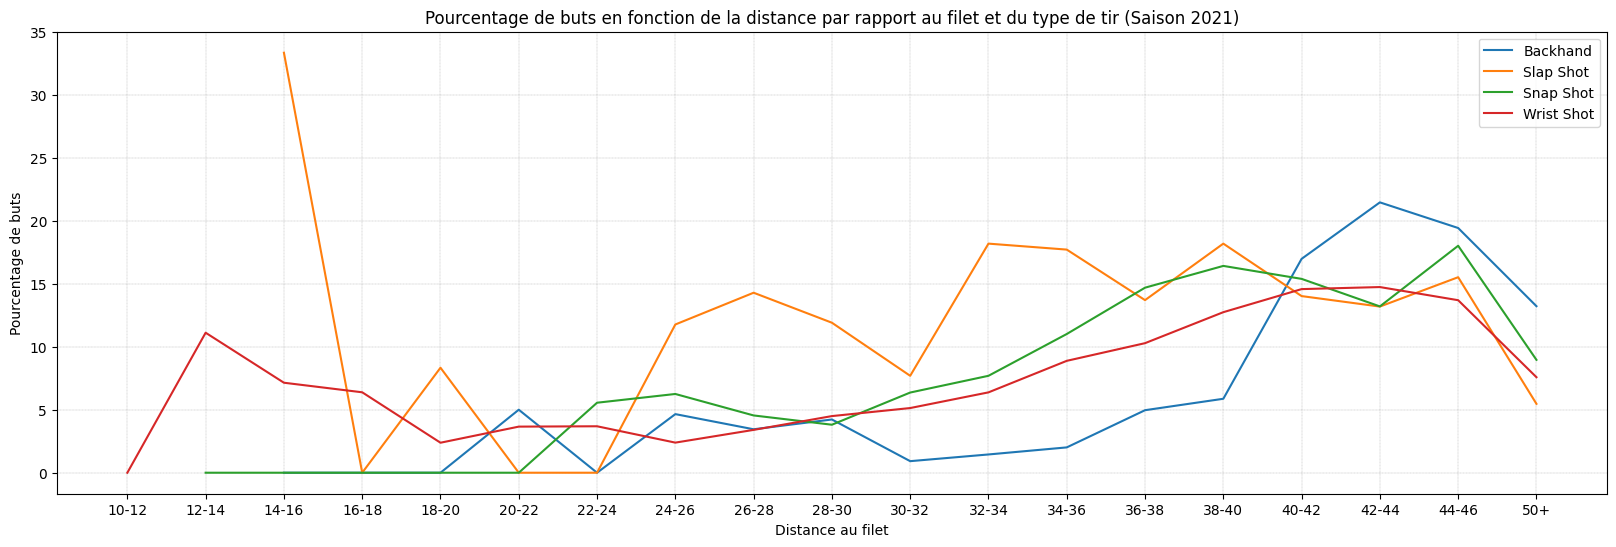

In [ ]:
# Test q2:

df = pd.read_csv('nhl_all_years_clean.csv')
plot_goal_percentage(df, 2021)

<ipython-input-2-1123ce154e6d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_2019['distance_group'] = pd.cut(data_2018_2019['distance_to_camp'], bins=distance_bins, labels=distance_labels)
<ipython-input-2-1123ce154e6d>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019_2020['distance_group'] = pd.cut(data_2019_2020['distance_to_camp'], bins=distance_bins, labels=distance_labels)
<ipython-input-2-1123ce154e6d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

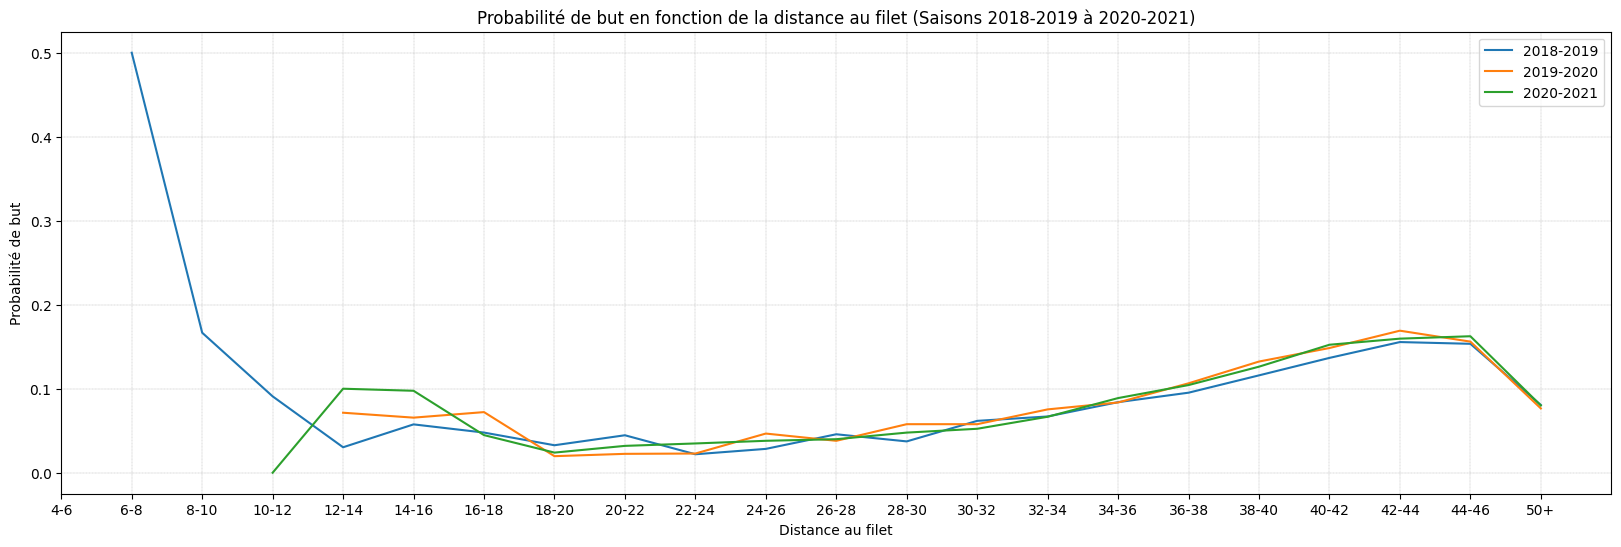

In [ ]:

# Test q3:

data = pd.read_csv('nhl_all_years_clean.csv')
plot_goal_probability_by_distance(data)


# New Section 6. Visualisations avancées:(30 %)

In [ ]:
df = pd.read_csv("nhl_all_years_clean.csv")
df = df.rename(columns={"Unnamed: 0": 'matchNum'})
df = df.iloc[:,1:]
#filter out les tirs sans coordonnées
df = df[df['coordinates']!='{}']
# et avec juste une coordonn/es
df = df[df['coordinates'].apply(lambda x: len(x.split(',')) == 2)]
df

,matchNum,dateTime,period,periodTime,event,eventTypeId,eventId,description,typeDeTir,strength,coordinates,scoreAfterShot,attackingTeamName,attackingTeamTriCode,tireur/ID,assist/ID,guardian/ID,emptyNet,season
0,0,2016-10-12T23:19:59Z,1,01:11,Shot,SHOT,8,Mitchell Marner Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,"{'x': -77.0, 'y': 5.0}","{'away': 0, 'home': 0}",Toronto Maple Leafs,TOR,"[('Mitchell Marner', 8478483)]",[],"('Craig Anderson', 8467950)",False,2016
1,0,2016-10-12T23:21:41Z,1,02:53,Shot,SHOT,11,Chris Kelly Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 86.0, 'y': 13.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Chris Kelly', 8467967)]",[],"('Frederik Andersen', 8475883)",False,2016
2,0,2016-10-12T23:23:17Z,1,04:01,Shot,SHOT,15,Cody Ceci Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 23.0, 'y': -38.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Cody Ceci', 8476879)]",[],"('Frederik Andersen', 8475883)",False,2016
3,0,2016-10-12T23:24:02Z,1,04:46,Shot,SHOT,16,Erik Karlsson Slap Shot saved by Frederik Ande...,Slap Shot,NaN,"{'x': 33.0, 'y': -15.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Erik Karlsson', 8474578)]",[],"('Frederik Andersen', 8475883)",False,2016
4,0,2016-10-12T23:27:30Z,1,06:46,Shot,SHOT,24,Martin Marincin Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,"{'x': -34.0, 'y': 28.0}","{'away': 0, 'home': 0}",Toronto Maple Leafs,TOR,"[('Martin Marincin', 8475716)]",[],"('Craig Anderson', 8467950)",False,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358217,5717,2021-05-09T05:02:46Z,3,19:57,Shot,SHOT,490,Noah Gregor Backhand saved by Adin Hill,Backhand,NaN,"{'x': 71.0, 'y': -16.0}","{'away': 4, 'home': 4}",San Jose Sharks,SJS,"[('Noah Gregor', 8479393)]",[],"('Adin Hill', 8478499)",False,2020
358218,5717,2021-05-09T05:05:28Z,4,00:33,Shot,SHOT,498,Erik Karlsson Wrist Shot saved by Adin Hill,Wrist Shot,NaN,"{'x': -68.0, 'y': -14.0}","{'away': 4, 'home': 4}",San Jose Sharks,SJS,"[('Erik Karlsson', 8474578)]",[],"('Adin Hill', 8478499)",False,2020
358219,5717,2021-05-09T05:06:21Z,4,00:57,Shot,SHOT,500,Conor Garland Wrist Shot saved by Alexei Melni...,Wrist Shot,NaN,"{'x': 56.0, 'y': 11.0}","{'away': 4, 'home': 4}",Arizona Coyotes,ARI,"[('Conor Garland', 8478856)]",[],"('Alexei Melnichuk', 8482246)",False,2020
358220,5717,2021-05-09T05:07:10Z,4,01:46,Shot,SHOT,751,Conor Garland Wrist Shot saved by Alexei Melni...,Wrist Shot,NaN,"{'x': 73.0, 'y': 6.0}","{'away': 4, 'home': 4}",Arizona Coyotes,ARI,"[('Conor Garland', 8478856)]",[],"('Alexei Melnichuk', 8482246)",False,2020


In [ ]:
def string_to_coordx(s):
    l = s.split(",")
    return float(l[0].split(' ')[-1])

def string_to_coordy(s):
    l = s.split(",")
    return float(l[-1].split(' ')[-1][:-1])

coords = df['coordinates']
dfff = df.copy()
dfff['x'] = coords.transform(string_to_coordx)
dfff['y'] = coords.transform(string_to_coordy)
#flip x coordinates to absolut value to get all transpose in one half og the field
dfff.loc[dfff['x']<0, 'y'] = dfff[dfff['x']<0]['y']*-1.
dfff.loc[dfff['x']<0, 'x'] = dfff[dfff['x']<0]['x']*-1.
dfff

,matchNum,dateTime,period,periodTime,event,eventTypeId,eventId,description,typeDeTir,strength,...,scoreAfterShot,attackingTeamName,attackingTeamTriCode,tireur/ID,assist/ID,guardian/ID,emptyNet,season,x,y
0,0,2016-10-12T23:19:59Z,1,01:11,Shot,SHOT,8,Mitchell Marner Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,...,"{'away': 0, 'home': 0}",Toronto Maple Leafs,TOR,"[('Mitchell Marner', 8478483)]",[],"('Craig Anderson', 8467950)",False,2016,77.0,-5.0
1,0,2016-10-12T23:21:41Z,1,02:53,Shot,SHOT,11,Chris Kelly Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,...,"{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Chris Kelly', 8467967)]",[],"('Frederik Andersen', 8475883)",False,2016,86.0,13.0
2,0,2016-10-12T23:23:17Z,1,04:01,Shot,SHOT,15,Cody Ceci Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,...,"{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Cody Ceci', 8476879)]",[],"('Frederik Andersen', 8475883)",False,2016,23.0,-38.0
3,0,2016-10-12T23:24:02Z,1,04:46,Shot,SHOT,16,Erik Karlsson Slap Shot saved by Frederik Ande...,Slap Shot,NaN,...,"{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Erik Karlsson', 8474578)]",[],"('Frederik Andersen', 8475883)",False,2016,33.0,-15.0
4,0,2016-10-12T23:27:30Z,1,06:46,Shot,SHOT,24,Martin Marincin Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,...,"{'away': 0, 'home': 0}",Toronto Maple Leafs,TOR,"[('Martin Marincin', 8475716)]",[],"('Craig Anderson', 8467950)",False,2016,34.0,-28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358217,5717,2021-05-09T05:02:46Z,3,19:57,Shot,SHOT,490,Noah Gregor Backhand saved by Adin Hill,Backhand,NaN,...,"{'away': 4, 'home': 4}",San Jose Sharks,SJS,"[('Noah Gregor', 8479393)]",[],"('Adin Hill', 8478499)",False,2020,71.0,-16.0
358218,5717,2021-05-09T05:05:28Z,4,00:33,Shot,SHOT,498,Erik Karlsson Wrist Shot saved by Adin Hill,Wrist Shot,NaN,...,"{'away': 4, 'home': 4}",San Jose Sharks,SJS,"[('Erik Karlsson', 8474578)]",[],"('Adin Hill', 8478499)",False,2020,68.0,14.0
358219,5717,2021-05-09T05:06:21Z,4,00:57,Shot,SHOT,500,Conor Garland Wrist Shot saved by Alexei Melni...,Wrist Shot,NaN,...,"{'away': 4, 'home': 4}",Arizona Coyotes,ARI,"[('Conor Garland', 8478856)]",[],"('Alexei Melnichuk', 8482246)",False,2020,56.0,11.0
358220,5717,2021-05-09T05:07:10Z,4,01:46,Shot,SHOT,751,Conor Garland Wrist Shot saved by Alexei Melni...,Wrist Shot,NaN,...,"{'away': 4, 'home': 4}",Arizona Coyotes,ARI,"[('Conor Garland', 8478856)]",[],"('Alexei Melnichuk', 8482246)",False,2020,73.0,6.0


In [ ]:
#rajoute une colonne pour le nombre de tir et le taux horraire de tirs pour chaque coordonn/es
grouped_df = dfff.copy()
match_count = df['matchNum'].loc[len(df)]
'''
grouped_df['counts'] = dfff.groupby(['x', 'y']).size().reset_index(name='counts')['counts']
grouped_df
'''
grouped_df['count'] = grouped_df.groupby(['x', 'y'])['matchNum'].transform('count')
grouped_df['tirs/h'] = grouped_df['count']/match_count
grouped_df

,matchNum,dateTime,period,periodTime,event,eventTypeId,eventId,description,typeDeTir,strength,...,attackingTeamTriCode,tireur/ID,assist/ID,guardian/ID,emptyNet,season,x,y,count,tirs/h
0,0,2016-10-12T23:19:59Z,1,01:11,Shot,SHOT,8,Mitchell Marner Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,...,TOR,"[('Mitchell Marner', 8478483)]",[],"('Craig Anderson', 8467950)",False,2016,77.0,-5.0,245,0.042855
1,0,2016-10-12T23:21:41Z,1,02:53,Shot,SHOT,11,Chris Kelly Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,...,OTT,"[('Chris Kelly', 8467967)]",[],"('Frederik Andersen', 8475883)",False,2016,86.0,13.0,36,0.006297
2,0,2016-10-12T23:23:17Z,1,04:01,Shot,SHOT,15,Cody Ceci Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,...,OTT,"[('Cody Ceci', 8476879)]",[],"('Frederik Andersen', 8475883)",False,2016,23.0,-38.0,11,0.001924
3,0,2016-10-12T23:24:02Z,1,04:46,Shot,SHOT,16,Erik Karlsson Slap Shot saved by Frederik Ande...,Slap Shot,NaN,...,OTT,"[('Erik Karlsson', 8474578)]",[],"('Frederik Andersen', 8475883)",False,2016,33.0,-15.0,46,0.008046
4,0,2016-10-12T23:27:30Z,1,06:46,Shot,SHOT,24,Martin Marincin Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,...,TOR,"[('Martin Marincin', 8475716)]",[],"('Craig Anderson', 8467950)",False,2016,34.0,-28.0,97,0.016967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358217,5717,2021-05-09T05:02:46Z,3,19:57,Shot,SHOT,490,Noah Gregor Backhand saved by Adin Hill,Backhand,NaN,...,SJS,"[('Noah Gregor', 8479393)]",[],"('Adin Hill', 8478499)",False,2020,71.0,-16.0,90,0.015743
358218,5717,2021-05-09T05:05:28Z,4,00:33,Shot,SHOT,498,Erik Karlsson Wrist Shot saved by Adin Hill,Wrist Shot,NaN,...,SJS,"[('Erik Karlsson', 8474578)]",[],"('Adin Hill', 8478499)",False,2020,68.0,14.0,90,0.015743
358219,5717,2021-05-09T05:06:21Z,4,00:57,Shot,SHOT,500,Conor Garland Wrist Shot saved by Alexei Melni...,Wrist Shot,NaN,...,ARI,"[('Conor Garland', 8478856)]",[],"('Alexei Melnichuk', 8482246)",False,2020,56.0,11.0,73,0.012769
358220,5717,2021-05-09T05:07:10Z,4,01:46,Shot,SHOT,751,Conor Garland Wrist Shot saved by Alexei Melni...,Wrist Shot,NaN,...,ARI,"[('Conor Garland', 8478856)]",[],"('Alexei Melnichuk', 8482246)",False,2020,73.0,6.0,152,0.026587


In [ ]:
#rajoute une colonne pour nombre de match jouer par equipe
grouped_df['matchPT'] = grouped_df.groupby(['attackingTeamTriCode'])['matchNum'].transform('nunique')

In [ ]:
#regroupement par equipe
team_df = grouped_df.copy()
team_df['count/Team'] = team_df.groupby(['x', 'y', 'attackingTeamTriCode'])['matchNum'].transform('count')
team_df['tirs/h/Team'] = team_df['count/Team']/ team_df['matchPT']
team_df['Diff.tirs/h'] = (team_df['tirs/h/Team'] - team_df['tirs/h'])/team_df['tirs/h']
team_df

,matchNum,dateTime,period,periodTime,event,eventTypeId,eventId,description,typeDeTir,strength,...,emptyNet,season,x,y,count,tirs/h,matchPT,count/Team,tirs/h/Team,Diff.tirs/h
0,0,2016-10-12T23:19:59Z,1,01:11,Shot,SHOT,8,Mitchell Marner Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,...,False,2016,77.0,-5.0,245,0.042855,372,10,0.026882,-0.372723
1,0,2016-10-12T23:21:41Z,1,02:53,Shot,SHOT,11,Chris Kelly Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,...,False,2016,86.0,13.0,36,0.006297,373,2,0.005362,-0.148496
2,0,2016-10-12T23:23:17Z,1,04:01,Shot,SHOT,15,Cody Ceci Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,...,False,2016,23.0,-38.0,11,0.001924,373,1,0.002681,0.393371
3,0,2016-10-12T23:24:02Z,1,04:46,Shot,SHOT,16,Erik Karlsson Slap Shot saved by Frederik Ande...,Slap Shot,NaN,...,False,2016,33.0,-15.0,46,0.008046,373,2,0.005362,-0.333605
4,0,2016-10-12T23:27:30Z,1,06:46,Shot,SHOT,24,Martin Marincin Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,...,False,2016,34.0,-28.0,97,0.016967,372,2,0.005376,-0.683128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358217,5717,2021-05-09T05:02:46Z,3,19:57,Shot,SHOT,490,Noah Gregor Backhand saved by Adin Hill,Backhand,NaN,...,False,2020,71.0,-16.0,90,0.015743,372,3,0.008065,-0.487724
358218,5717,2021-05-09T05:05:28Z,4,00:33,Shot,SHOT,498,Erik Karlsson Wrist Shot saved by Adin Hill,Wrist Shot,NaN,...,False,2020,68.0,14.0,90,0.015743,372,3,0.008065,-0.487724
358219,5717,2021-05-09T05:06:21Z,4,00:57,Shot,SHOT,500,Conor Garland Wrist Shot saved by Alexei Melni...,Wrist Shot,NaN,...,False,2020,56.0,11.0,73,0.012769,372,3,0.008065,-0.368427
358220,5717,2021-05-09T05:07:10Z,4,01:46,Shot,SHOT,751,Conor Garland Wrist Shot saved by Alexei Melni...,Wrist Shot,NaN,...,False,2020,73.0,6.0,152,0.026587,372,3,0.008065,-0.696679


# LE HeatMap

In [ ]:
def getTeamSeasonDf(team, season):
    TeamName = team
    SeasonChosen = season

    mtl_df = team_df[team_df['attackingTeamName']==TeamName]
    # Slice la saison
    mtl_year_month_df = mtl_df[mtl_df['season']== SeasonChosen]
    mtl_year_month_df
    dff = mtl_year_month_df
    return dff

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image

data = getTeamSeasonDf('Colorado Avalanche', 2016)
fig = px.density_contour(data, x="y", y="x")
fig.update_traces(contours_coloring="fill", contours_showlabels = False)

image_path = "/content/figures/nhl_rink.png"  # Replace with the actual path to your PNG image
image = Image.open(image_path)

rotated_image = image.rotate(90, expand=True)

width, height = rotated_image.size

# Crop the bottom half of the image
cropped_image = image.crop((0, 0, width, height // 2))
i = cropped_image.rotate(270, expand=True)

# Add the PNG image as a background
fig.add_layout_image(
    source=i,
    x=-0.2,
    y=1.02,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="top",
    sizex=1.22,
    sizey=1.2,
    opacity=0.5  # Adjust opacity as needed
)

# Customize the plot
fig.update_layout(
    width=1000,
    height=1000,
    title='Colorado Avalanche 2016: Densité de tirs par heure',
    xaxis=dict(range=[-42.5,42.5]),
    yaxis=dict(range=[0,100]),
    xaxis_title='Distance from centre of rink (ft)',
    yaxis_title='Distance from goal line (ft)'
)


fig.show()
fig.write_html("Avalanche2016.html")

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image

data = getTeamSeasonDf('Colorado Avalanche', 2020)
fig = px.density_contour(data, x="y", y="x")
fig.update_traces(contours_coloring="fill", contours_showlabels = False)

image_path = "/content/figures/nhl_rink.png"  # Replace with the actual path to your PNG image
image = Image.open(image_path)

rotated_image = image.rotate(90, expand=True)

width, height = rotated_image.size

# Crop the bottom half of the image
cropped_image = image.crop((0, 0, width, height // 2))
i = cropped_image.rotate(270, expand=True)

# Add the PNG image as a background
fig.add_layout_image(
    source=i,
    x=-0.2,
    y=1.02,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="top",
    sizex=1.22,
    sizey=1.2,
    opacity=0.5  # Adjust opacity as needed
)

# Customize the plot
fig.update_layout(
    width=1000,
    height=1000,
    title='Colorado Avalanche 2020: Densité de tirs par heure',
    xaxis=dict(range=[-42.5,42.5]),
    yaxis=dict(range=[0,100]),
    xaxis_title='Distance from centre of rink (ft)',
    yaxis_title='Distance from goal line (ft)'
)


fig.show()
fig.write_html("Avalanche2020.html")

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image

data = getTeamSeasonDf('Buffalo Sabres', 2018)
fig = px.density_contour(data, x="y", y="x")
fig.update_traces(contours_coloring="fill", contours_showlabels = False)

image_path = "/content/figures/nhl_rink.png"  # Replace with the actual path to your PNG image
image = Image.open(image_path)

rotated_image = image.rotate(90, expand=True)

width, height = rotated_image.size

# Crop the bottom half of the image
cropped_image = image.crop((0, 0, width, height // 2))
i = cropped_image.rotate(270, expand=True)

# Add the PNG image as a background
fig.add_layout_image(
    source=i,
    x=-0.2,
    y=1.02,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="top",
    sizex=1.22,
    sizey=1.2,
    opacity=0.5  # Adjust opacity as needed
)

# Customize the plot
fig.update_layout(
    width=1000,
    height=1000,
    title='Buffalo Sabres 2018: Densité de tirs par heure',
    xaxis=dict(range=[-42.5,42.5]),
    yaxis=dict(range=[0,100]),
    xaxis_title='Distance from centre of rink (ft)',
    yaxis_title='Distance from goal line (ft)'
)


fig.show()
fig.write_html("Sabres2018.html")

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image

data = getTeamSeasonDf('Buffalo Sabres', 2019)
fig = px.density_contour(data, x="y", y="x")
fig.update_traces(contours_coloring="fill", contours_showlabels = False)

image_path = "/content/figures/nhl_rink.png"  # Replace with the actual path to your PNG image
image = Image.open(image_path)

rotated_image = image.rotate(90, expand=True)

width, height = rotated_image.size

# Crop the bottom half of the image
cropped_image = image.crop((0, 0, width, height // 2))
i = cropped_image.rotate(270, expand=True)

# Add the PNG image as a background
fig.add_layout_image(
    source=i,
    x=-0.2,
    y=1.02,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="top",
    sizex=1.22,
    sizey=1.2,
    opacity=0.5  # Adjust opacity as needed
)

# Customize the plot
fig.update_layout(
    width=1000,
    height=1000,
    title='Buffalo Sabres 2019: Densité de tirs par heure',
    xaxis=dict(range=[-42.5,42.5]),
    yaxis=dict(range=[0,100]),
    xaxis_title='Distance from centre of rink (ft)',
    yaxis_title='Distance from goal line (ft)'
)


fig.show()
fig.write_html("Sabres2019.html")

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image

data = getTeamSeasonDf('Buffalo Sabres', 2020)
fig = px.density_contour(data, x="y", y="x")
fig.update_traces(contours_coloring="fill", contours_showlabels = False)

image_path = "/content/figures/nhl_rink.png"  # Replace with the actual path to your PNG image
image = Image.open(image_path)

rotated_image = image.rotate(90, expand=True)

width, height = rotated_image.size

# Crop the bottom half of the image
cropped_image = image.crop((0, 0, width, height // 2))
i = cropped_image.rotate(270, expand=True)

# Add the PNG image as a background
fig.add_layout_image(
    source=i,
    x=-0.2,
    y=1.02,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="top",
    sizex=1.22,
    sizey=1.2,
    opacity=0.5  # Adjust opacity as needed
)

# Customize the plot
fig.update_layout(
    width=1000,
    height=1000,
    title='Buffalo Sabres 2020: Densité de tirs par heure',
    xaxis=dict(range=[-42.5,42.5]),
    yaxis=dict(range=[0,100]),
    xaxis_title='Distance from centre of rink (ft)',
    yaxis_title='Distance from goal line (ft)'
)


fig.show()
fig.write_html("Sabres2020.html")

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image

data = getTeamSeasonDf('Tampa Bay Lightning', 2018)
fig = px.density_contour(data, x="y", y="x")
fig.update_traces(contours_coloring="fill", contours_showlabels = False)

image_path = "/content/figures/nhl_rink.png"  # Replace with the actual path to your PNG image
image = Image.open(image_path)

rotated_image = image.rotate(90, expand=True)

width, height = rotated_image.size

# Crop the bottom half of the image
cropped_image = image.crop((0, 0, width, height // 2))
i = cropped_image.rotate(270, expand=True)

# Add the PNG image as a background
fig.add_layout_image(
    source=i,
    x=-0.2,
    y=1.02,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="top",
    sizex=1.22,
    sizey=1.2,
    opacity=0.5  # Adjust opacity as needed
)

# Customize the plot
fig.update_layout(
    width=1000,
    height=1000,
    title='Tampa Bay Lightning 2018: Densité de tirs par heure',
    xaxis=dict(range=[-42.5,42.5]),
    yaxis=dict(range=[0,100]),
    xaxis_title='Distance from centre of rink (ft)',
    yaxis_title='Distance from goal line (ft)'
)


fig.show()
fig.write_html("Lightning2018.html")

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image

data = getTeamSeasonDf('Tampa Bay Lightning', 2019)
fig = px.density_contour(data, x="y", y="x")
fig.update_traces(contours_coloring="fill", contours_showlabels = False)

image_path = "/content/figures/nhl_rink.png"  # Replace with the actual path to your PNG image
image = Image.open(image_path)

rotated_image = image.rotate(90, expand=True)

width, height = rotated_image.size

# Crop the bottom half of the image
cropped_image = image.crop((0, 0, width, height // 2))
i = cropped_image.rotate(270, expand=True)

# Add the PNG image as a background
fig.add_layout_image(
    source=i,
    x=-0.2,
    y=1.02,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="top",
    sizex=1.22,
    sizey=1.2,
    opacity=0.5  # Adjust opacity as needed
)

# Customize the plot
fig.update_layout(
    width=1000,
    height=1000,
    title='Tampa Bay Lightning 2019: Densité de tirs par heure',
    xaxis=dict(range=[-42.5,42.5]),
    yaxis=dict(range=[0,100]),
    xaxis_title='Distance from centre of rink (ft)',
    yaxis_title='Distance from goal line (ft)'
)


fig.show()
fig.write_html("Lightning2019.html")

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image

data = getTeamSeasonDf('Tampa Bay Lightning', 2020)
fig = px.density_contour(data, x="y", y="x")
fig.update_traces(contours_coloring="fill", contours_showlabels = False)

image_path = "/content/figures/nhl_rink.png"  # Replace with the actual path to your PNG image
image = Image.open(image_path)

rotated_image = image.rotate(90, expand=True)

width, height = rotated_image.size

# Crop the bottom half of the image
cropped_image = image.crop((0, 0, width, height // 2))
i = cropped_image.rotate(270, expand=True)

# Add the PNG image as a background
fig.add_layout_image(
    source=i,
    x=-0.2,
    y=1.02,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="top",
    sizex=1.22,
    sizey=1.2,
    opacity=0.5  # Adjust opacity as needed
)

# Customize the plot
fig.update_layout(
    width=1000,
    height=1000,
    title='Tampa Bay Lightning 2020: Densité de tirs par heure',
    xaxis=dict(range=[-42.5,42.5]),
    yaxis=dict(range=[0,100]),
    xaxis_title='Distance from centre of rink (ft)',
    yaxis_title='Distance from goal line (ft)'
)


fig.show()
fig.write_html("Lightning2020.html")

advanced Q.1 ***intégrer les 8 graphiques qui seront utiles aux réponses suivantes***
 Un problème avec plotly nous bloque. Nous avons donc incorporé nos propres graphiques pour soutenir nos prochaines questions. Leurs productions somt incluses dans le notebook pour prouver l'authenticité.

Q.2 Les graphiques permettent de comparer les habitudes de tirs d'une équipe par rapport au reste de la ligue. Les analyser peut permettre d'identifier des tendances par rapport au joueur de LNH moyen.

Q.3 Un regardant la carte des Avalanches en 2016, on peut identifier qu'ils envoient une grande majorité de leurs tirs à proximité du filet et un peu de tirs de distance sur les côtés. Le graphique de la même équipe en 2020 est assez similaire. Pourtant le classement des Avalanches en 2016 n'était pas aussi démarquant

Q.4 Comparant les 6 cartes des 2 équipes, Les lightnings ont un style beaucoup plus varié. Leurs graphs d'année en année sont très variables comparémment au graph des Sabres qui sont similaires d'année en année. Ces images sont pourtant loin d'être suffisante pour tout comprendre sur les succès ou problèmes d'une équipe. Que les buts et les tirs bloqués soient tous deux représentés sans distinction peut causer des problèmes d'interprétation. L'évolution des tirs dans un match selon les positions que le gardien arrive à intercepter ou non, donnerait un autre oeil sur la valeur de l'équipe.